In [1]:
import tensorflow as tf

C:\Users\Kasparas\anaconda3\envs\tf\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [ ]:
print(tf.config.list_physical_devices())

In [ ]:
import tensorflow as tf; print(tf.config.list_physical_devices('GPU'))

In [2]:
tf.config.list_physical_devices()

[PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU'),
 PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [1]:
import pandas as pd
import numpy as np
import tensorflow as tf
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from collections import Counter
import tensorflow.keras as keras
from tensorflow.keras.layers import Dense, Input
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
import keras_cv

from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import requests

import os
import time
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow.keras as keras
from tensorflow.keras.layers import Dense, Input, Flatten, Conv2D, BatchNormalization, \
                                    Activation, Dropout, MaxPooling2D
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import TensorBoard
from IPython.display import YouTubeVideo
from PIL import Image

C:\Users\Kasparas\anaconda3\envs\tf\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
C:\Users\Kasparas\anaconda3\envs\tf\lib\site-packages\tqdm\auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
data = np.load('flatland_train.npz')
X = data['X']
y = data['y']

y[y != 0] -= 2    # Correct labels so that triangle is mapped to class 1
X = X / 255.      # Scale down to range [0, 1]

In [18]:
X.shape

(10000, 50, 50)

In [19]:
y.shape

(10000,)

In [20]:
Counter(y)

Counter({2.0: 1868, 4.0: 1761, 3.0: 2137, 1.0: 2853, 0.0: 1381})

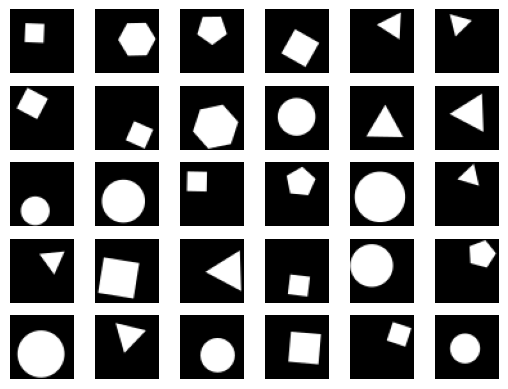

In [21]:
for i in range(30):
    ax = plt.subplot(5,6,i+1)
    
    ax.axis('off')
    plt.imshow(X[i],cmap='gray')

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 50, 50)]          0         
                                                                 
 flatten_2 (Flatten)         (None, 2500)              0         
                                                                 
 dense_10 (Dense)            (None, 2000)              5002000   
                                                                 
 dropout_8 (Dropout)         (None, 2000)              0         
                                                                 
 dense_11 (Dense)            (None, 1000)              2001000   
                                                                 
 dropout_9 (Dropout)         (None, 1000)              0         
                                                                 
 dense_12 (Dense)            (None, 500)               5005

<AxesSubplot:>

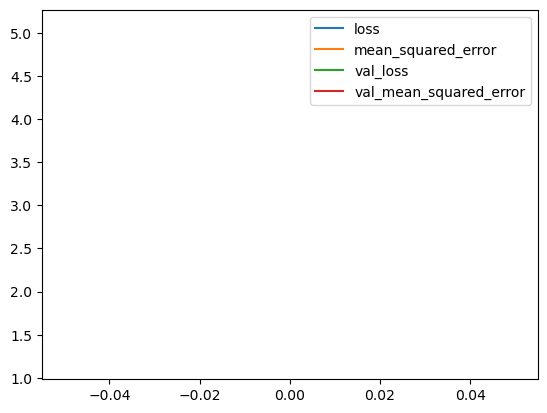

In [6]:
inp = keras.layers.Input(shape=(50,50))
out = keras.layers.Flatten()(inp)
out = keras.layers.Dense(2000, activation='relu')(out)
out = keras.layers.Dropout(0.2)(out)
out = keras.layers.Dense(1000, activation='relu')(out)
out = keras.layers.Dropout(0.2)(out)
out = keras.layers.Dense(500, activation='relu')(out)
out = keras.layers.Dropout(0.2)(out)
out = keras.layers.Dense(250, activation='relu')(out)
out = keras.layers.Dropout(0.2)(out)
out = keras.layers.Dense(5, activation='softmax')(out)

model = keras.models.Model(inputs=inp, outputs=out)
model.compile(optimizer=keras.optimizers.Adam(learning_rate=3e-4), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

model.summary()
hist = model.fit(X,y,epochs=1,batch_size=64, validation_split=0.2)

pd.DataFrame(hist.history).plot()

We can get a case of deep double descent with 15 epochs, batch_size 2 in the following case

The case below gives us deep double descent.
https://openai.com/blog/deep-double-descent/

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 48, 48, 32)        320       
                                                                 
 conv2d_1 (Conv2D)           (None, 46, 46, 64)        18496     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 23, 23, 64)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 23, 23, 64)        0         
                                                                 
 flatten (Flatten)           (None, 33856)             0         
                                                                 
 dense (Dense)               (None, 128)               4333696   
                                                        

<AxesSubplot:>

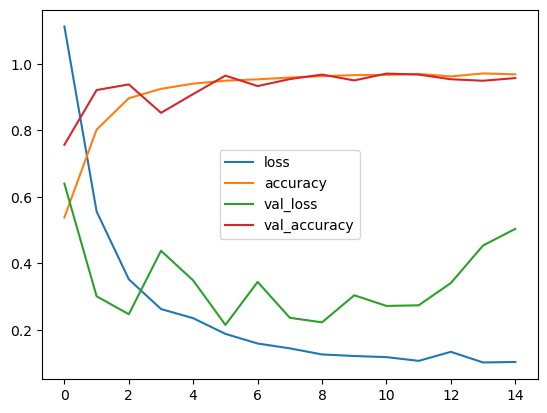

In [12]:
model = keras.models.Sequential()
model.add(keras.layers.Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=[50, 50, 1]))
model.add(keras.layers.Conv2D(64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(keras.layers.Dense(128, activation="relu"))
model.add(Dropout(0.4))
model.add(keras.layers.Dense(10, activation="softmax"))
model.compile(loss="sparse_categorical_crossentropy",
              optimizer=keras.optimizers.Adam(),
              metrics=["accuracy"])
model.summary()

loss = model.fit(X, y, epochs=15, batch_size=2, validation_split=0.2)

pd.DataFrame(loss.history).plot()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_14 (Conv2D)          (None, 48, 48, 64)        640       
                                                                 
 conv2d_15 (Conv2D)          (None, 46, 46, 64)        36928     
                                                                 
 conv2d_16 (Conv2D)          (None, 44, 44, 64)        36928     
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 22, 22, 64)       0         
 2D)                                                             
                                                                 
 dropout_12 (Dropout)        (None, 22, 22, 64)        0         
                                                                 
 flatten_6 (Flatten)         (None, 30976)             0         
                                                      

<AxesSubplot:>

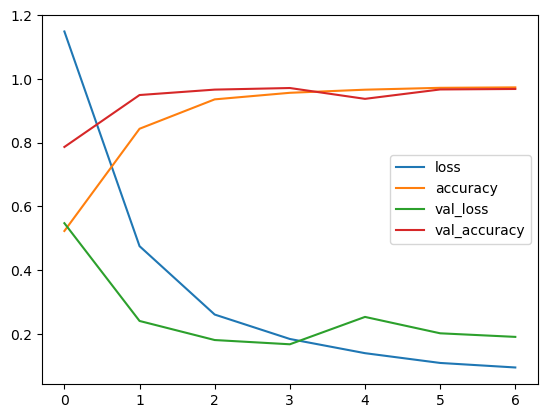

In [16]:
model = keras.models.Sequential()
model.add(keras.layers.Conv2D(64, kernel_size=(3, 3), activation='relu', input_shape=[50, 50, 1]))
model.add(keras.layers.Conv2D(64, kernel_size=(3, 3), activation='relu'))
model.add(keras.layers.Conv2D(64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(keras.layers.Dense(256, activation="relu"))
model.add(Dropout(0.5))
model.add(keras.layers.Dense(10, activation="softmax"))
model.compile(loss="sparse_categorical_crossentropy",
              optimizer=keras.optimizers.Adam(),
              metrics=["accuracy"])
model.summary()

loss = model.fit(X, y, epochs=7, batch_size=16, validation_split=0.2)

pd.DataFrame(loss.history).plot()

#Train set accuracy 98.57% Test set (simple) accuracy 97.31% Test set (adv.) accuracy 75.46%

In [17]:
model.save('model.h5')

Model: "sequential_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_53 (Conv2D)          (None, 48, 48, 32)        320       
                                                                 
 conv2d_54 (Conv2D)          (None, 46, 46, 32)        9248      
                                                                 
 conv2d_55 (Conv2D)          (None, 44, 44, 32)        9248      
                                                                 
 conv2d_56 (Conv2D)          (None, 42, 42, 32)        9248      
                                                                 
 conv2d_57 (Conv2D)          (None, 40, 40, 32)        9248      
                                                                 
 conv2d_58 (Conv2D)          (None, 38, 38, 32)        9248      
                                                                 
 conv2d_59 (Conv2D)          (None, 36, 36, 32)      

<AxesSubplot:>

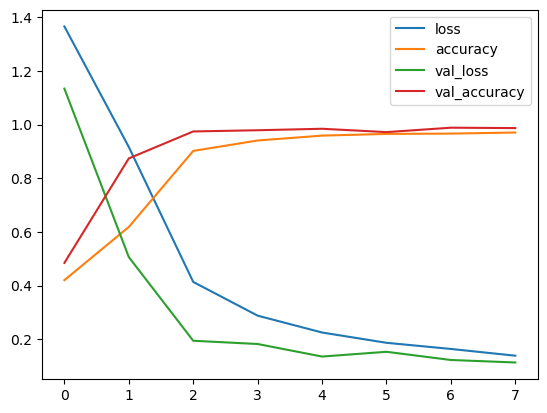

In [27]:
model = keras.models.Sequential()
model.add(keras.layers.Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=[50, 50, 1]))
model.add(keras.layers.Conv2D(32, kernel_size=(3, 3), activation='relu'))
model.add(keras.layers.Conv2D(32, kernel_size=(3, 3), activation='relu'))
model.add(keras.layers.Conv2D(32, kernel_size=(3, 3), activation='relu'))
model.add(keras.layers.Conv2D(32, kernel_size=(3, 3), activation='relu'))
model.add(keras.layers.Conv2D(32, kernel_size=(3, 3), activation='relu'))
model.add(keras.layers.Conv2D(32, kernel_size=(3, 3), activation='relu'))
model.add(keras.layers.Conv2D(32, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(keras.layers.Dense(256, activation="relu"))
model.add(Dropout(0.5))
model.add(keras.layers.Dense(10, activation="softmax"))
model.compile(loss="sparse_categorical_crossentropy",
              optimizer=keras.optimizers.Adam(learning_rate=3e-4),
              metrics=["accuracy"])
model.summary()

loss = model.fit(X, y, epochs=8, batch_size=16, validation_split=0.2)

pd.DataFrame(loss.history).plot()

#Train set accuracy 98.33% Test set (simple) accuracy 99.54% Test set (adv.) accuracy 85.39%

In [28]:
model.save('model.h5')

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_57 (Conv2D)          (None, 48, 48, 32)        320       
                                                                 
 max_pooling2d_29 (MaxPoolin  (None, 24, 24, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_58 (Conv2D)          (None, 22, 22, 32)        9248      
                                                                 
 conv2d_59 (Conv2D)          (None, 20, 20, 32)        9248      
                                                                 
 conv2d_60 (Conv2D)          (None, 18, 18, 32)        9248      
                                                                 
 conv2d_61 (Conv2D)          (None, 16, 16, 32)        9248      
                                                      

<AxesSubplot:>

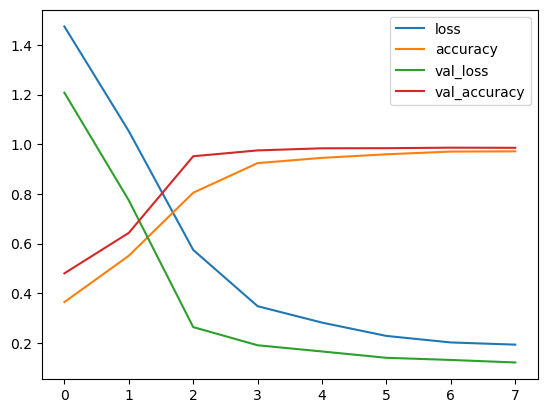

In [17]:
model = keras.models.Sequential()
model.add(keras.layers.Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=[50, 50, 1]))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(keras.layers.Conv2D(32, kernel_size=(3, 3), activation='relu'))

model.add(keras.layers.Conv2D(32, kernel_size=(3, 3), activation='relu'))

model.add(keras.layers.Conv2D(32, kernel_size=(3, 3), activation='relu'))

model.add(keras.layers.Conv2D(32, kernel_size=(3, 3), activation='relu'))

model.add(keras.layers.Conv2D(32, kernel_size=(3, 3), activation='relu'))

model.add(keras.layers.Conv2D(32, kernel_size=(3, 3), activation='relu'))

model.add(keras.layers.Conv2D(32, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(keras.layers.Dense(256, activation="relu"))
model.add(Dropout(0.5))
model.add(keras.layers.Dense(10, activation="softmax"))
model.compile(loss="sparse_categorical_crossentropy",
              optimizer=keras.optimizers.Adam(learning_rate=3e-4),
              metrics=["accuracy"])
model.summary()

loss = model.fit(X, y, epochs=8, batch_size=16, validation_split=0.2)

pd.DataFrame(loss.history).plot()

In [58]:
model.save('model.h5')

In [3]:
data = np.load('flatland_train.npz')
X = data['X']
y = data['y']

y[y != 0] -= 2    # Correct labels so that triangle is mapped to class 1
X = X / 255.      # Scale down to range [0, 1]

In [35]:
datagen = ImageDataGenerator(
    rotation_range=40,
    width_shift_range=0.4,
    height_shift_range=0.4,
    zoom_range = [0.3, 1.7],
    shear_range = 12,
    horizontal_flip=True,
    vertical_flip=True,
    fill_mode='nearest')

In [5]:
X = np.expand_dims(X, axis=3)
X.shape

(10000, 50, 50, 1)

In [6]:
X = np.reshape(X,(10000,50,50,1))

In [48]:
X_aug = X

In [20]:
shp=np.multiply(X_aug.shape,2)

In [23]:
shp[0]

20000

In [51]:
datagen.fit(X_aug)

In [46]:
X_aug = datagen.flow(X)

In [50]:
X_aug.shape

(10000, 50, 50, 1)

In [29]:
X_all = np.zeros((shp[0],50,50,1))

In [30]:
X_all.shape

(20000, 50, 50, 1)

In [33]:
for i in X:
    X_all[i]=

ValueError: too many values to unpack (expected 2)

In [ ]:
X_all = np.concatenate((X,X_aug))

In [11]:
X_all.shape

NameError: name 'X_all' is not defined

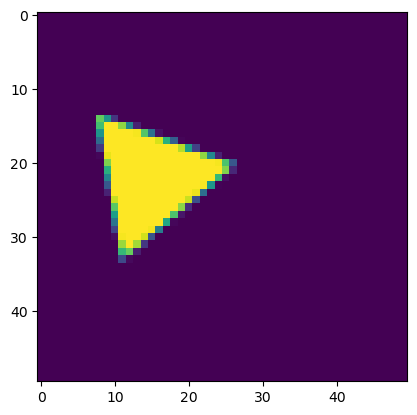

In [57]:
plt.imshow(X_aug[119])

In [39]:
y_all = np.concatenate((y,y))

Model: "sequential_17"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_136 (Conv2D)         (None, 48, 48, 32)        320       
                                                                 
 max_pooling2d_34 (MaxPoolin  (None, 24, 24, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_137 (Conv2D)         (None, 22, 22, 32)        9248      
                                                                 
 conv2d_138 (Conv2D)         (None, 20, 20, 32)        9248      
                                                                 
 conv2d_139 (Conv2D)         (None, 18, 18, 32)        9248      
                                                                 
 conv2d_140 (Conv2D)         (None, 16, 16, 32)        9248      
                                                     

<AxesSubplot:>

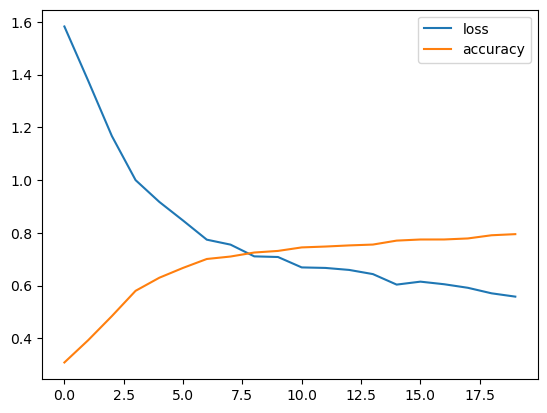

In [74]:
model = keras.models.Sequential()
model.add(keras.layers.Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=[50, 50, 1]))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(keras.layers.Conv2D(32, kernel_size=(3, 3), activation='relu'))

model.add(keras.layers.Conv2D(32, kernel_size=(3, 3), activation='relu'))

model.add(keras.layers.Conv2D(32, kernel_size=(3, 3), activation='relu'))

model.add(keras.layers.Conv2D(32, kernel_size=(3, 3), activation='relu'))

model.add(keras.layers.Conv2D(32, kernel_size=(3, 3), activation='relu'))

model.add(keras.layers.Conv2D(32, kernel_size=(3, 3), activation='relu'))

model.add(keras.layers.Conv2D(32, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(keras.layers.Dense(256, activation="relu"))
model.add(Dropout(0.5))
model.add(keras.layers.Dense(10, activation="softmax"))
model.compile(loss="sparse_categorical_crossentropy",
              optimizer=keras.optimizers.Adam(learning_rate=3e-4),
              metrics=["accuracy"])
model.summary()

loss = model.fit(datagen.flow(X_aug,y,batch_size=8), epochs=20)

pd.DataFrame(loss.history).plot()

#Train set accuracy 98.52% Test set (simple) accuracy 100.00% Test set (adv.) accuracy 98.30%

In [75]:
model.save('model.h5')

In [12]:
datagen1 = ImageDataGenerator(
    rotation_range=25,
    width_shift_range=0.2,
    height_shift_range=0.2,
    zoom_range = [0.5, 1.5],
    shear_range = 10,
    horizontal_flip=True,
    vertical_flip=True,
    fill_mode='nearest')

In [13]:
datagen2 = ImageDataGenerator(
    rotation_range=2,
    width_shift_range=0.05,
    height_shift_range=0.05,
    zoom_range = [0.95, 1.05],
    shear_range = 2,
    fill_mode='nearest')

In [14]:
datagen3 = ImageDataGenerator(
    rotation_range=4,
    width_shift_range=0.07,
    height_shift_range=0.07,
    zoom_range = [0.90, 1.1],
    shear_range = 3,
    horizontal_flip=True,
    fill_mode='nearest')

In [15]:
datagen4 = ImageDataGenerator(
    rotation_range=8,
    width_shift_range=0.14,
    height_shift_range=0.04,
    zoom_range = [0.87, 1.13],
    shear_range = 4,
    vertical_flip=True,
    fill_mode='nearest')

In [16]:
datagen5 = ImageDataGenerator(
    rotation_range=5,
    width_shift_range=0.14,
    height_shift_range=0.25,
    zoom_range = [0.83, 1.17],
    shear_range = 5,
    fill_mode='nearest')

In [17]:
datagen6 = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.7,
    height_shift_range=0.05,
    zoom_range = [0.79, 1.21],
    shear_range = 7,
    horizontal_flip=True,
    vertical_flip=True,
    fill_mode='nearest')

In [18]:
datagen7 = ImageDataGenerator(
    rotation_range=21,
    width_shift_range=0.1,
    height_shift_range=0.1,
    zoom_range = [0.4, 1.6],
    shear_range = 9,
    fill_mode='nearest')

In [19]:
datagen8 = ImageDataGenerator(
    rotation_range=1,
    width_shift_range=0.4,
    height_shift_range=0.4,
    zoom_range = [0.5, 1.5],
    shear_range = 4,
    vertical_flip=True,
    fill_mode='nearest')

In [20]:
datagen9 = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.05,
    height_shift_range=0.1,
    zoom_range = [0.4, 1.6],
    shear_range = 12,
    vertical_flip=True,
    fill_mode='nearest')

In [21]:
datagen10 = ImageDataGenerator(
    rotation_range=25,
    width_shift_range=0.5,
    height_shift_range=0.5,
    zoom_range = [0.5, 1.5],
    shear_range = 7,
    horizontal_flip=True,
    fill_mode='nearest')

In [22]:
data = np.load('flatland_train.npz')
X = data['X']
y = data['y']

y[y != 0] -= 2    # Correct labels so that triangle is mapped to class 1
X = X / 255.      # Scale down to range [0, 1]

In [23]:
X = np.expand_dims(X, axis=3)
X.shape

(10000, 50, 50, 1)

In [24]:
X_aug.shape

(10000, 50, 50, 1)

In [25]:
X_aug1 = X
X_aug2 = X
X_aug3 = X
X_aug4 = X
X_aug5 = X
X_aug6 = X
X_aug7 = X
X_aug8 = X
X_aug9 = X
X_aug10 = X

In [26]:
datagen1.fit(X_aug1)
datagen2.fit(X_aug2)
datagen3.fit(X_aug3)
datagen4.fit(X_aug4)
datagen5.fit(X_aug5)
datagen6.fit(X_aug6)
datagen7.fit(X_aug7)
datagen8.fit(X_aug8)
datagen9.fit(X_aug9)
datagen10.fit(X_aug10)

In [27]:
X_giga = np.concatenate((X,X_aug1,X_aug2,X_aug3,X_aug4,X_aug5,X_aug6,X_aug7,X_aug8,X_aug9,X_aug10))

In [28]:
y_giga = np.concatenate((y,y,y,y,y,y,y,y,y,y,y))

Model: "sequential_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_80 (Conv2D)          (None, 48, 48, 32)        320       
                                                                 
 max_pooling2d_20 (MaxPoolin  (None, 24, 24, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_81 (Conv2D)          (None, 22, 22, 32)        9248      
                                                                 
 conv2d_82 (Conv2D)          (None, 20, 20, 32)        9248      
                                                                 
 conv2d_83 (Conv2D)          (None, 18, 18, 32)        9248      
                                                                 
 max_pooling2d_21 (MaxPoolin  (None, 9, 9, 32)         0         
 g2D)                                                

<AxesSubplot:>

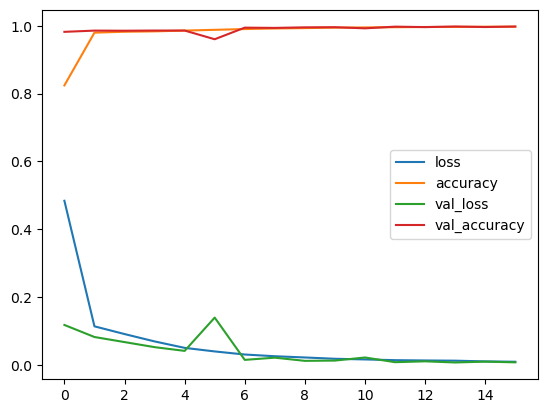

In [58]:
model = keras.models.Sequential()
model.add(keras.layers.Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=[50, 50, 1]))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(keras.layers.Conv2D(32, kernel_size=(3, 3), activation='relu'))

model.add(keras.layers.Conv2D(32, kernel_size=(3, 3), activation='relu'))

model.add(keras.layers.Conv2D(32, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(keras.layers.Conv2D(32, kernel_size=(3, 3), activation='relu'))

model.add(keras.layers.Conv2D(32, kernel_size=(3, 3), activation='relu'))

model.add(keras.layers.Conv2D(32, kernel_size=(3, 3), activation='relu'))

model.add(keras.layers.Conv2D(32, kernel_size=(3, 3), activation='relu'))

model.add(Flatten())
model.add(keras.layers.Dense(256, activation="relu"))
model.add(Dropout(0.3))
model.add(keras.layers.Dense(10, activation="softmax"))
model.compile(loss="sparse_categorical_crossentropy",
              optimizer=keras.optimizers.Adam(learning_rate=3e-4),
              metrics=["accuracy"])
model.summary()

loss = model.fit(X_giga, y_giga, epochs=16, batch_size=16, validation_split=0.05)

pd.DataFrame(loss.history).plot()

In [59]:
model.save('model.h5')

In [29]:
X_aug11 = X_giga
X_aug22 = X_giga
X_aug33 = X_giga
X_aug44 = X_giga
X_aug55 = X_giga
X_aug66 = X_giga
X_aug77 = X_giga
X_aug88 = X_giga
X_aug99 = X_giga
X_aug1010 = X_giga

In [30]:
datagen1.fit(X_aug11)
datagen2.fit(X_aug22)
datagen3.fit(X_aug33)
datagen4.fit(X_aug44)
datagen5.fit(X_aug55)
datagen6.fit(X_aug66)
datagen7.fit(X_aug77)
datagen8.fit(X_aug88)
datagen9.fit(X_aug99)
datagen10.fit(X_aug1010)


In [31]:
datagen.fit(X_giga)

In [32]:
X_gigamega = np.concatenate((X,X_aug11))

In [33]:
y_gigamega = np.concatenate((y,y_giga))

In [34]:
y_gigamega.shape

(120000,)

In [35]:
X_gigamega.shape

(120000, 50, 50, 1)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 48, 48, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 24, 24, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 22, 22, 32)        9248      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 11, 11, 32)       0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 3872)              0         
                                                                 
 dense (Dense)               (None, 32)                1

<AxesSubplot:>

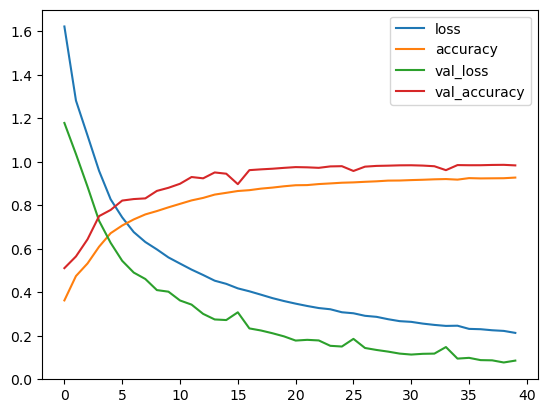

In [36]:
model = keras.models.Sequential()
model.add(keras.layers.Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=[50, 50, 1]))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(keras.layers.Conv2D(32, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())
model.add(keras.layers.Dense(32, activation="relu"))
model.add(Dropout(0.5))
model.add(keras.layers.Dense(10, activation="softmax"))
model.compile(loss="sparse_categorical_crossentropy",
              optimizer=keras.optimizers.Adam(learning_rate=3e-4),
              metrics=["accuracy"])
model.summary()

loss = model.fit(X_gigamega, y_gigamega, epochs=40, batch_size=512, validation_split=0.3)

pd.DataFrame(loss.history).plot()

In [37]:
model.save('model.h5')

## the final countdown dudududud

In [3]:
datagen = ImageDataGenerator(
    rotation_range=40,
    width_shift_range=0.4,
    height_shift_range=0.4,
    zoom_range = [0.3, 1.7],
    shear_range = 12,
    horizontal_flip=True,
    vertical_flip=True,
    fill_mode='nearest')

In [4]:
X_turbo=np.concatenate((X,X,X,X,X))

In [5]:
y_turbo=np.concatenate((y,y,y,y,y))

In [83]:
datagen.fit(X_turbo)

Model: "sequential_19"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_152 (Conv2D)         (None, 48, 48, 32)        320       
                                                                 
 max_pooling2d_38 (MaxPoolin  (None, 24, 24, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_153 (Conv2D)         (None, 22, 22, 32)        9248      
                                                                 
 conv2d_154 (Conv2D)         (None, 20, 20, 32)        9248      
                                                                 
 conv2d_155 (Conv2D)         (None, 18, 18, 32)        9248      
                                                                 
 conv2d_156 (Conv2D)         (None, 16, 16, 32)        9248      
                                                     

<AxesSubplot:>

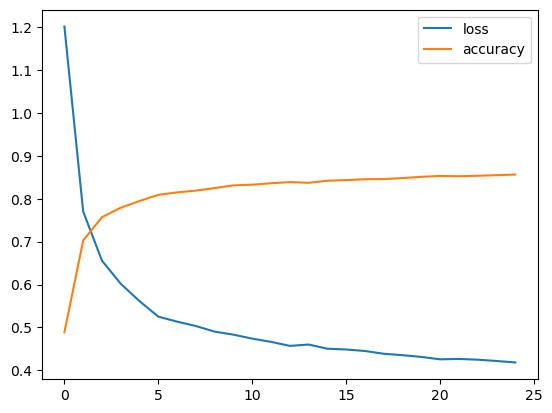

In [85]:
model = keras.models.Sequential()
model.add(keras.layers.Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=[50, 50, 1]))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(keras.layers.Conv2D(32, kernel_size=(3, 3), activation='relu'))

model.add(keras.layers.Conv2D(32, kernel_size=(3, 3), activation='relu'))

model.add(keras.layers.Conv2D(32, kernel_size=(3, 3), activation='relu'))

model.add(keras.layers.Conv2D(32, kernel_size=(3, 3), activation='relu'))

model.add(keras.layers.Conv2D(32, kernel_size=(3, 3), activation='relu'))

model.add(keras.layers.Conv2D(32, kernel_size=(3, 3), activation='relu'))

model.add(keras.layers.Conv2D(32, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(keras.layers.Dense(256, activation="relu"))
model.add(Dropout(0.5))
model.add(keras.layers.Dense(10, activation="softmax"))
model.compile(loss="sparse_categorical_crossentropy",
              optimizer=keras.optimizers.Adam(learning_rate=3e-4),
              metrics=["accuracy"])
model.summary()

loss = model.fit(datagen.flow(X_turbo,y_turbo,batch_size=8), epochs=25)

pd.DataFrame(loss.history).plot()

In [87]:
model.save('model.h5')

## Smaller weight

In [3]:
datagen = ImageDataGenerator(
    rotation_range=50,
    width_shift_range=0.5,
    height_shift_range=0.5,
    zoom_range = [0.2, 1.8],
    shear_range = 15,
    horizontal_flip=True,
    vertical_flip=True,
    fill_mode='nearest')

Model: "sequential_79"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_491 (Conv2D)         (None, 48, 48, 32)        320       
                                                                 
 max_pooling2d_199 (MaxPooli  (None, 24, 24, 32)       0         
 ng2D)                                                           
                                                                 
 conv2d_492 (Conv2D)         (None, 22, 22, 64)        18496     
                                                                 
 conv2d_493 (Conv2D)         (None, 20, 20, 64)        36928     
                                                                 
 max_pooling2d_200 (MaxPooli  (None, 10, 10, 64)       0         
 ng2D)                                                           
                                                                 
 conv2d_494 (Conv2D)         (None, 8, 8, 32)        

<AxesSubplot:>

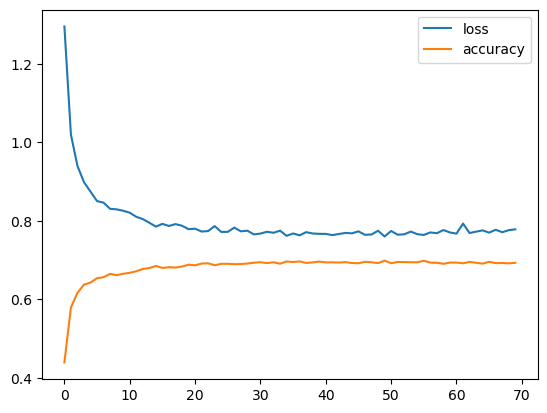

In [155]:
model = keras.models.Sequential()
model.add(keras.layers.Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=[50, 50, 1]))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(keras.layers.Conv2D(64, kernel_size=(3, 3), activation='relu'))
model.add(keras.layers.Conv2D(64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(keras.layers.Conv2D(32, kernel_size=(3, 3), activation='relu'))
model.add(keras.layers.Conv2D(32, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(keras.layers.Dense(512, activation="relu"))
model.add(Dropout(0.5))
model.add(keras.layers.Dense(10, activation="softmax"))
model.compile(loss="sparse_categorical_crossentropy",
              optimizer=keras.optimizers.Adam(learning_rate=3e-4),
              metrics=["accuracy"])
model.summary()

loss = model.fit(datagen.flow(X_turbo,y_turbo,batch_size=4), epochs=70)

pd.DataFrame(loss.history).plot()

In [156]:
model.save('model.h5')

Model: "sequential_80"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_496 (Conv2D)         (None, 48, 48, 32)        320       
                                                                 
 max_pooling2d_202 (MaxPooli  (None, 24, 24, 32)       0         
 ng2D)                                                           
                                                                 
 conv2d_497 (Conv2D)         (None, 22, 22, 64)        18496     
                                                                 
 conv2d_498 (Conv2D)         (None, 20, 20, 64)        36928     
                                                                 
 max_pooling2d_203 (MaxPooli  (None, 10, 10, 64)       0         
 ng2D)                                                           
                                                                 
 conv2d_499 (Conv2D)         (None, 8, 8, 32)        

<AxesSubplot:>

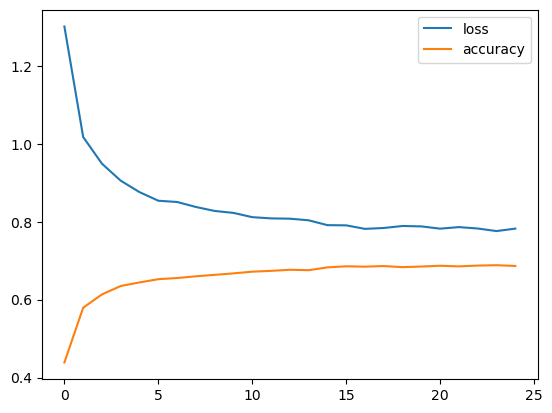

In [157]:
model = keras.models.Sequential()
model.add(keras.layers.Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=[50, 50, 1]))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(keras.layers.Conv2D(64, kernel_size=(3, 3), activation='relu'))
model.add(keras.layers.Conv2D(64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(keras.layers.Conv2D(32, kernel_size=(3, 3), activation='relu'))
model.add(keras.layers.Conv2D(32, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(keras.layers.Dense(512, activation="relu"))
model.add(Dropout(0.5))
model.add(keras.layers.Dense(10, activation="softmax"))
model.compile(loss="sparse_categorical_crossentropy",
              optimizer=keras.optimizers.Adam(learning_rate=3e-4),
              metrics=["accuracy"])
model.summary()

loss = model.fit(datagen.flow(X_turbo,y_turbo,batch_size=4), epochs=25)

pd.DataFrame(loss.history).plot()

In [158]:
model.save('model2.h5')

In [159]:
model = keras.models.Sequential()
model.add(keras.layers.Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=[50, 50, 1]))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(keras.layers.Conv2D(64, kernel_size=(3, 3), activation='relu'))
model.add(keras.layers.Conv2D(64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(keras.layers.Conv2D(32, kernel_size=(3, 3), activation='relu'))
model.add(keras.layers.Conv2D(32, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(keras.layers.Dense(512, activation="relu"))
model.add(Dropout(0.5))
model.add(keras.layers.Dense(10, activation="softmax"))
model.compile(loss="sparse_categorical_crossentropy",
              optimizer=keras.optimizers.Adam(learning_rate=3e-4),
              metrics=["accuracy"])
model.summary()

loss = model.fit(datagen.flow(X_turbo,y_turbo,batch_size=8), epochs=20)

pd.DataFrame(loss.history).plot()

Model: "sequential_81"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_501 (Conv2D)         (None, 48, 48, 32)        320       
                                                                 
 max_pooling2d_205 (MaxPooli  (None, 24, 24, 32)       0         
 ng2D)                                                           
                                                                 
 conv2d_502 (Conv2D)         (None, 22, 22, 64)        18496     
                                                                 
 conv2d_503 (Conv2D)         (None, 20, 20, 64)        36928     
                                                                 
 max_pooling2d_206 (MaxPooli  (None, 10, 10, 64)       0         
 ng2D)                                                           
                                                                 
 conv2d_504 (Conv2D)         (None, 8, 8, 32)        

KeyboardInterrupt: 

In [ ]:
model.save('model3.h5')

In [160]:
model = keras.models.Sequential()
model.add(keras.layers.Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=[50, 50, 1]))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(keras.layers.Conv2D(32, kernel_size=(3, 3), activation='relu'))

model.add(keras.layers.Conv2D(32, kernel_size=(3, 3), activation='relu'))

model.add(keras.layers.Conv2D(32, kernel_size=(3, 3), activation='relu'))

model.add(keras.layers.Conv2D(32, kernel_size=(3, 3), activation='relu'))

model.add(keras.layers.Conv2D(32, kernel_size=(3, 3), activation='relu'))

model.add(keras.layers.Conv2D(32, kernel_size=(3, 3), activation='relu'))

model.add(keras.layers.Conv2D(32, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(keras.layers.Dense(256, activation="relu"))
model.add(Dropout(0.5))
model.add(keras.layers.Dense(10, activation="softmax"))
model.compile(loss="sparse_categorical_crossentropy",
              optimizer=keras.optimizers.Adam(learning_rate=3e-4),
              metrics=["accuracy"])
model.summary()

loss = model.fit(datagen.flow(X_turbo,y_turbo,batch_size=4), epochs=37)

pd.DataFrame(loss.history).plot()

Model: "sequential_82"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_506 (Conv2D)         (None, 48, 48, 32)        320       
                                                                 
 max_pooling2d_208 (MaxPooli  (None, 24, 24, 32)       0         
 ng2D)                                                           
                                                                 
 conv2d_507 (Conv2D)         (None, 22, 22, 32)        9248      
                                                                 
 conv2d_508 (Conv2D)         (None, 20, 20, 32)        9248      
                                                                 
 conv2d_509 (Conv2D)         (None, 18, 18, 32)        9248      
                                                                 
 conv2d_510 (Conv2D)         (None, 16, 16, 32)        9248      
                                                     

KeyboardInterrupt: 

In [ ]:
model.save('model3.h5')

In [7]:
X_turbo = np.expand_dims(X_turbo, axis=3)
X_turbo.shape

(50000, 50, 50, 1)

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_8 (Conv2D)           (None, 48, 48, 32)        320       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 24, 24, 32)       0         
 2D)                                                             
                                                                 
 conv2d_9 (Conv2D)           (None, 22, 22, 32)        9248      
                                                                 
 conv2d_10 (Conv2D)          (None, 20, 20, 32)        9248      
                                                                 
 conv2d_11 (Conv2D)          (None, 18, 18, 32)        9248      
                                                                 
 conv2d_12 (Conv2D)          (None, 16, 16, 32)        9248      
                                                      

<AxesSubplot:>

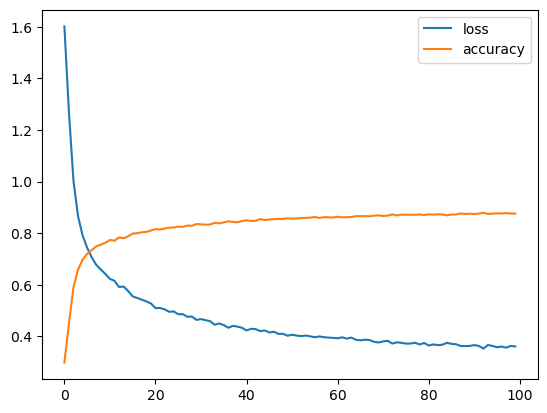

In [8]:
model = keras.models.Sequential()
model.add(keras.layers.Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=[50, 50, 1]))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(keras.layers.Conv2D(32, kernel_size=(3, 3), activation='relu'))

model.add(keras.layers.Conv2D(32, kernel_size=(3, 3), activation='relu'))

model.add(keras.layers.Conv2D(32, kernel_size=(3, 3), activation='relu'))

model.add(keras.layers.Conv2D(32, kernel_size=(3, 3), activation='relu'))

model.add(keras.layers.Conv2D(32, kernel_size=(3, 3), activation='relu'))

model.add(keras.layers.Conv2D(32, kernel_size=(3, 3), activation='relu'))

model.add(keras.layers.Conv2D(32, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(keras.layers.Dense(256, activation="relu"))
model.add(Dropout(0.5))
model.add(keras.layers.Dense(10, activation="softmax"))
model.compile(loss="sparse_categorical_crossentropy",
              optimizer=keras.optimizers.Adam(learning_rate=3e-4),
              metrics=["accuracy"])
model.summary()

loss = model.fit(datagen.flow(X_turbo,y_turbo,batch_size=128), epochs=100)

pd.DataFrame(loss.history).plot()

In [9]:
#Train set accuracy 98.52% Test set (simple) accuracy 100.00% Test set (adv.) accuracy 99.95%
model.save('model4.h5')

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_40 (Conv2D)          (None, 48, 48, 32)        320       
                                                                 
 max_pooling2d_10 (MaxPoolin  (None, 24, 24, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_41 (Conv2D)          (None, 22, 22, 32)        9248      
                                                                 
 conv2d_42 (Conv2D)          (None, 20, 20, 32)        9248      
                                                                 
 conv2d_43 (Conv2D)          (None, 18, 18, 32)        9248      
                                                                 
 conv2d_44 (Conv2D)          (None, 16, 16, 32)        9248      
                                                      

<AxesSubplot:>

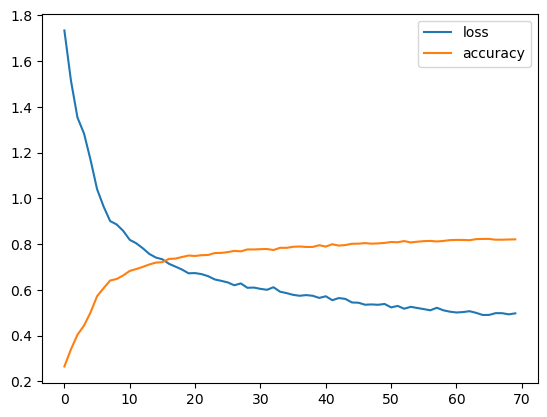

In [14]:
model = keras.models.Sequential()
model.add(keras.layers.Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=[50, 50, 1]))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(keras.layers.Conv2D(32, kernel_size=(3, 3), activation='relu'))

model.add(keras.layers.Conv2D(32, kernel_size=(3, 3), activation='relu'))

model.add(keras.layers.Conv2D(32, kernel_size=(3, 3), activation='relu'))

model.add(keras.layers.Conv2D(32, kernel_size=(3, 3), activation='relu'))

model.add(keras.layers.Conv2D(32, kernel_size=(3, 3), activation='relu'))

model.add(keras.layers.Conv2D(32, kernel_size=(3, 3), activation='relu'))

model.add(keras.layers.Conv2D(32, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(keras.layers.Dense(256, activation="relu"))
model.add(Dropout(0.5))
model.add(keras.layers.Dense(10, activation="softmax"))
model.compile(loss="sparse_categorical_crossentropy",
              optimizer=keras.optimizers.Adam(learning_rate=3e-4),
              metrics=["accuracy"])
model.summary()

loss = model.fit(datagen.flow(X_turbo,y_turbo,batch_size=512), epochs=70)

pd.DataFrame(loss.history).plot()

In [15]:
model.save('model5.h5')

Model: "sequential_14"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_112 (Conv2D)         (None, 48, 48, 32)        320       
                                                                 
 max_pooling2d_28 (MaxPoolin  (None, 24, 24, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_113 (Conv2D)         (None, 22, 22, 32)        9248      
                                                                 
 conv2d_114 (Conv2D)         (None, 20, 20, 32)        9248      
                                                                 
 conv2d_115 (Conv2D)         (None, 18, 18, 32)        9248      
                                                                 
 conv2d_116 (Conv2D)         (None, 16, 16, 32)        9248      
                                                     

<AxesSubplot:>

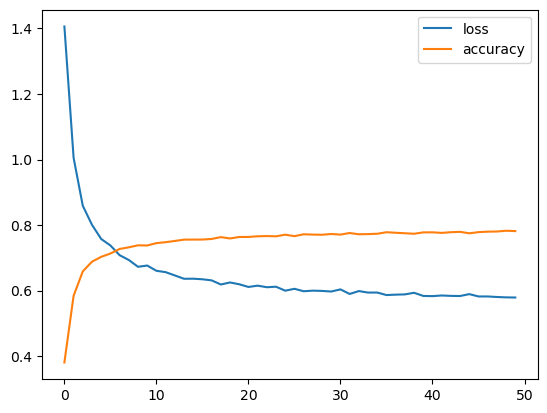

In [21]:
model = keras.models.Sequential()
model.add(keras.layers.Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=[50, 50, 1]))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(keras.layers.Conv2D(32, kernel_size=(3, 3), activation='relu'))

model.add(keras.layers.Conv2D(32, kernel_size=(3, 3), activation='relu'))

model.add(keras.layers.Conv2D(32, kernel_size=(3, 3), activation='relu'))

model.add(keras.layers.Conv2D(32, kernel_size=(3, 3), activation='relu'))

model.add(keras.layers.Conv2D(32, kernel_size=(3, 3), activation='relu'))

model.add(keras.layers.Conv2D(32, kernel_size=(3, 3), activation='relu'))

model.add(keras.layers.Conv2D(32, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(keras.layers.Dense(256, activation="relu"))
model.add(Dropout(0.5))
model.add(keras.layers.Dense(10, activation="softmax"))
model.compile(loss="sparse_categorical_crossentropy",
              optimizer=keras.optimizers.Adam(learning_rate=0.001),
              metrics=["accuracy"])
model.summary()

loss = model.fit(datagen.flow(X_turbo,y_turbo,batch_size=128), epochs=50)

pd.DataFrame(loss.history).plot()

In [22]:
model.save('model7.h5')

Model: "sequential_15"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_120 (Conv2D)         (None, 48, 48, 32)        320       
                                                                 
 max_pooling2d_30 (MaxPoolin  (None, 24, 24, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_121 (Conv2D)         (None, 22, 22, 32)        9248      
                                                                 
 conv2d_122 (Conv2D)         (None, 20, 20, 32)        9248      
                                                                 
 conv2d_123 (Conv2D)         (None, 18, 18, 32)        9248      
                                                                 
 conv2d_124 (Conv2D)         (None, 16, 16, 32)        9248      
                                                     

<AxesSubplot:>

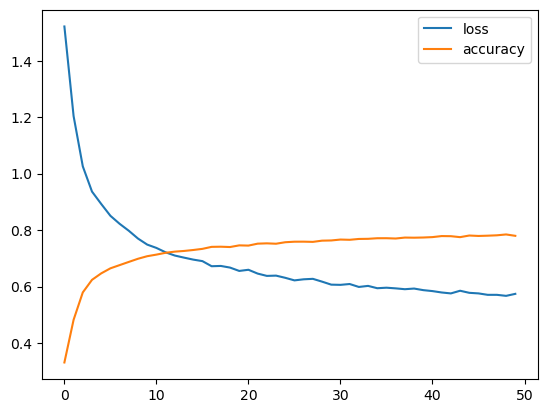

In [23]:
model = keras.models.Sequential()
model.add(keras.layers.Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=[50, 50, 1]))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(keras.layers.Conv2D(32, kernel_size=(3, 3), activation='relu'))

model.add(keras.layers.Conv2D(32, kernel_size=(3, 3), activation='relu'))

model.add(keras.layers.Conv2D(32, kernel_size=(3, 3), activation='relu'))

model.add(keras.layers.Conv2D(32, kernel_size=(3, 3), activation='relu'))

model.add(keras.layers.Conv2D(32, kernel_size=(3, 3), activation='relu'))

model.add(keras.layers.Conv2D(32, kernel_size=(3, 3), activation='relu'))

model.add(keras.layers.Conv2D(32, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(keras.layers.Dense(256, activation="relu"))
model.add(Dropout(0.5))
model.add(keras.layers.Dense(10, activation="softmax"))
model.compile(loss="sparse_categorical_crossentropy",
              optimizer=keras.optimizers.Adam(learning_rate=3e-4),
              metrics=["accuracy"])
model.summary()

loss = model.fit(datagen.flow(X_turbo,y_turbo,batch_size=64), epochs=50)

pd.DataFrame(loss.history).plot()

In [24]:
model.save('model8.h5')

Model: "sequential_16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_128 (Conv2D)         (None, 48, 48, 32)        320       
                                                                 
 max_pooling2d_32 (MaxPoolin  (None, 24, 24, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_129 (Conv2D)         (None, 22, 22, 32)        9248      
                                                                 
 conv2d_130 (Conv2D)         (None, 20, 20, 32)        9248      
                                                                 
 conv2d_131 (Conv2D)         (None, 18, 18, 32)        9248      
                                                                 
 conv2d_132 (Conv2D)         (None, 16, 16, 32)        9248      
                                                     

Epoch 56/70
391/391 [==============================] - 18s 45ms/step - loss: 0.7012 - accuracy: 0.7275
Epoch 57/70
391/391 [==============================] - 17s 44ms/step - loss: 0.7059 - accuracy: 0.7245
Epoch 58/70
391/391 [==============================] - 17s 43ms/step - loss: 0.7023 - accuracy: 0.7243
Epoch 59/70
391/391 [==============================] - 18s 45ms/step - loss: 0.6899 - accuracy: 0.7305
Epoch 60/70
391/391 [==============================] - 17s 44ms/step - loss: 0.6967 - accuracy: 0.7302
Epoch 61/70
391/391 [==============================] - 17s 44ms/step - loss: 0.6897 - accuracy: 0.7323
Epoch 62/70
391/391 [==============================] - 18s 46ms/step - loss: 0.6850 - accuracy: 0.7338
Epoch 63/70
391/391 [==============================] - 17s 45ms/step - loss: 0.6948 - accuracy: 0.7291
Epoch 64/70
391/391 [==============================] - 18s 46ms/step - loss: 0.6820 - accuracy: 0.7359
Epoch 65/70
391/391 [==============================] - 18s 45ms/step - lo

<AxesSubplot:>

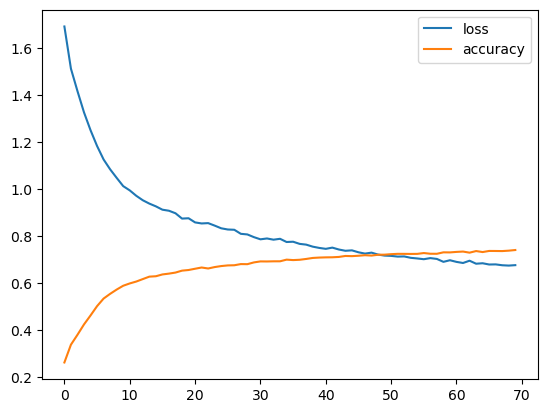

In [25]:
model = keras.models.Sequential()
model.add(keras.layers.Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=[50, 50, 1]))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(keras.layers.Conv2D(32, kernel_size=(3, 3), activation='relu'))

model.add(keras.layers.Conv2D(32, kernel_size=(3, 3), activation='relu'))

model.add(keras.layers.Conv2D(32, kernel_size=(3, 3), activation='relu'))

model.add(keras.layers.Conv2D(32, kernel_size=(3, 3), activation='relu'))

model.add(keras.layers.Conv2D(32, kernel_size=(3, 3), activation='relu'))

model.add(keras.layers.Conv2D(32, kernel_size=(3, 3), activation='relu'))

model.add(keras.layers.Conv2D(32, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(keras.layers.Dense(256, activation="relu"))
model.add(Dropout(0.5))
model.add(keras.layers.Dense(10, activation="softmax"))
model.compile(loss="sparse_categorical_crossentropy",
              optimizer=keras.optimizers.Adam(learning_rate=0.0001),
              metrics=["accuracy"])
model.summary()

loss = model.fit(datagen.flow(X_turbo,y_turbo,batch_size=128), epochs=70)

pd.DataFrame(loss.history).plot()

In [26]:
model.save('model9.h5')